In [1]:
from convex_func import convex_func_lin,convex_func_smooth
import matplotlib.pyplot as plt
import numpy as np
import math
from GH_capacities_convex import GH_capacities_conv

In [3]:
x=np.arange(0,1,0.0001)
len(x)

10000

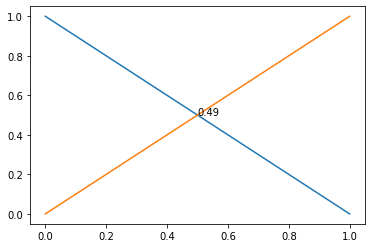

In [4]:
# ellipsoid case
f_ell=[convex_func_lin(x,[0.2],[0.8]) for x in x]
plt.plot(x,f_ell)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f_ell - x))).flatten()[0]
plt.annotate('%.4s' %x[idx], xy=(x[idx], f_ell[idx]))

plt.show()

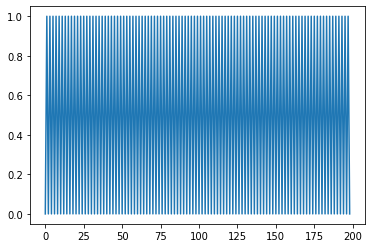

In [5]:
# computing Gutt-Hutchings capacities for ellipsoid
ghc=GH_capacities_conv(200,x,f_ell)
# computing "spectral gap" consecutive gaps
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)

We observe there is subsequence for which the "spectral gap" is zero, these are iterations when the Reeb flow is identity. 

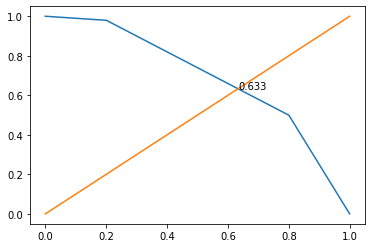

In [6]:
# piece-wise linear function
f=[convex_func_lin(x,[0.2,0.8],[0.98,0.5]) for x in x]
plt.plot(x,f)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f - x))).flatten()[0]
plt.annotate('%.5s' %x[idx], xy=(x[idx], f[idx]))

plt.show()

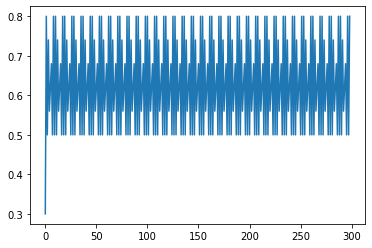

In [7]:
#computing Gutt-Hutchings capacity piece-wise linear convex function
ghc=GH_capacities_conv(300,x,f)
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)

The consecutive differences "spectral gap" of capacities between 0.5 and 0.9.

As proved by Gutt-Hutchings, the $c_k/k$ converges to the cube capacity. The cube capacity is the fixed point $x_0$ such that $f(x_0)=x_0$.


0.6361204013377926

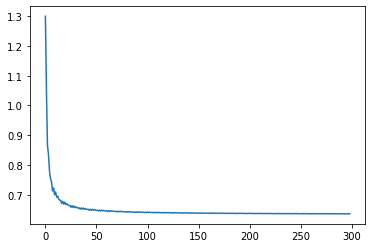

In [8]:
cube_cap = [ghc[i]/i for i in range(1,len(ghc))]
plt.plot(range(len(cube_cap)),cube_cap)
cube_cap[-1]

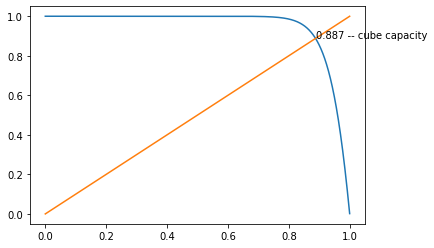

In [18]:
# smooth convex function 
f=[convex_func_smooth(x,10) for x in x]
plt.plot(x,f)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f - x))).flatten()[0]
plt.annotate('%.5s -- cube capacity' %x[idx], xy=(x[idx], f[idx]))

plt.show()

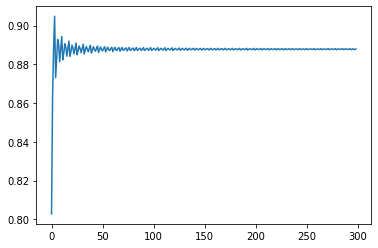

In [15]:
#computing Gutt-Hutchings capacity for smooth convex function
ghc=GH_capacities_conv(300,x,f)
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)


In [19]:
diff[-1]

0.8879482413178721

Conjecturely, in the smooth case "spectral gap" would converge to the cube capacity in the smooth case.